In [1]:
import pandas as pd
import re
import numpy as np
pd.set_option('display.max_columns', 100)  # or 1000
pd.set_option('display.max_rows', 300)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
from soynlp.hangle import levenshtein, jamo_levenshtein
import time
from PIL import Image
import cv2
import os

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [ ]:
lexicon = pd.read_csv('ocr_lexicon.csv')

In [7]:
lexicon = lexicon.rename(columns={'FOOD_NM' : '가공식품'})

In [26]:
# lexicon[lexicon['preprocess'].apply(lambda x : bool(re.compile('!').search(x)))]

,가공식품,preprocess,ed


In [8]:
lexicon

,FOOD_CD,가공식품
0,N022000001,포테이토칩
1,N022000002,"프링글즈,오리지날"
2,N022000003,들깨강정
3,G012000776,땅콩강정
4,N022000005,보리강정
...,...,...
2148,N246000952,에그 베이글 스타벅스
2149,N246000953,베이컨 치즈베이글 스타벅스
2150,N246000954,포크 커틀릿 샌드위치 스타벅스
2151,N246000955,만한대찬 우육면 매운 소고기맛 Uni President


In [9]:
lexicon['preprocess'] = lexicon['가공식품'].apply(lambda x : x.replace(' ', '_'))
lexicon['preprocess'] = lexicon['preprocess'].apply(lambda x : x.replace(',', '_' ))
lexicon['preprocess'] = lexicon['preprocess'].apply(lambda x : x.replace(' ', '_' ))

In [48]:
# lexicon['preprocess'] = lexicon['preprocess'].apply(lambda x : x.replace('(', '_' ))
# lexicon['preprocess'] = lexicon['preprocess'].apply(lambda x : x.replace(')', '_' ))
# lexicon['preprocess'] = lexicon['preprocess'].apply(lambda x : x.replace('[', '_' ))
# lexicon['preprocess'] = lexicon['preprocess'].apply(lambda x : x.replace(']', '_' ))
# lexicon['preprocess'] = lexicon['preprocess'].apply(lambda x : x.replace('!', '!_' ))
lexicon['preprocess'] = lexicon['preprocess'].apply(lambda x : x.replace('브이푸드', '브이푸드_' ))
lexicon['preprocess'] = lexicon['preprocess'].apply(lambda x : x.replace('__', '_' ))

In [11]:
# 마지막에 _ 만 달랑 있는애들 _ 제거하기
lexicon['preprocess'] = lexicon['preprocess'].apply(lambda x : x[:-1] if bool(re.compile('.*_$').search(x)) else x )
# 앞에 _ 만 있는애들 _ 제거하기
lexicon['preprocess'] = lexicon['preprocess'].apply(lambda x : x[1:] if bool(re.compile('^_.*').search(x)) else x )

In [49]:
lexicon[lexicon['preprocess'].map(lambda x : True if re.compile('브이푸드').match(x) else False)]

,FOOD_CD,가공식품,preprocess,ed
2002,N246000798,브이푸드 우먼프로그램 한국야쿠르트,브이푸드_우먼프로그램_한국야쿠르트,0.5
2003,N246000799,브이푸드 맨프로그램 한국야쿠르트,브이푸드_맨프로그램_한국야쿠르트,0.5
2004,N246000800,브이푸드 골드프로그램 한국야쿠르트,브이푸드_골드프로그램_한국야쿠르트,0.5
2006,N246000802,브이푸드아세로라비타민샷 한국야쿠르트,브이푸드_아세로라비타민샷_한국야쿠르트,1.0
2011,N246000807,브이푸드칼슘마그네슘 한국야쿠르트,브이푸드_칼슘마그네슘_한국야쿠르트,0.7


In [71]:
lexicon[['FOOD_CD', 'preprocess']].to_csv('OCR_lexicon_pre.csv', index=False)

## SAVE POINT

In [83]:
lexicon = pd.read_csv('OCR_lexicon_pre.csv')
lexicon

,FOOD_CD,preprocess
0,N022000001,포테이토칩
1,N022000002,프링글즈_오리지날
2,N022000003,들깨강정
3,G012000776,땅콩강정
4,N022000005,보리강정
...,...,...
2148,N246000952,에그_베이글_스타벅스
2149,N246000953,베이컨_치즈베이글_스타벅스
2150,N246000954,포크_커틀릿_샌드위치_스타벅스
2151,N246000955,만한대찬_우육면_매운_소고기맛_Uni_President


In [60]:
lexicon = pd.read_csv('/home/Data/FoodDetection/Serving/ocr/pipeline/OCR_lexicon_pre.csv' ,error_bad_lines=False)

In [21]:
# ed_list = []
# for word in lexicon['preprocess']:
#     word_ed = []
#     word_split = word.split('_')
#     for each in example:
    
#         best_of_word = []
#         for word_ in word_split:
#             ed = levenshtein(each, word_)
#             er = ed/(max(len(word_), len(each)))
#             if er > 0.5:
#                 er= 1
#             best_of_word.append(er)
#         word_ed.append(min(best_of_word))
#     print(f'word_ed : {word_ed}')
#     n_1 = word_ed.count(1)
#     if n_1 >1:
#         for _ in range(n_1 -1):
#             word_ed.remove(1)
#         print('word_ed after pop : ', word_ed)
#         div_val = len(word_split) - n_1 + 1
#         print(f'div val : {div_val}')
#         ed_list.append(sum(word_ed)/div_val)
#     else:
#         ed_list.append(sum(word_ed)/len(word_split))
# #     ed_list.append(word_ed/len(word_split))

# # lexicon['ed'] = ed_list

word_ed : [1, 1, 1]
word_ed after pop :  [1]
div val : 0


ZeroDivisionError: division by zero

In [22]:
base_path = '/home/Data/FoodDetection/data/text_detection/RDProject'
test_files = os.listdir(base_path)
test_img_paths = [os.path.join(base_path, path) for path in test_files]
path_iterer = iter(test_img_paths)

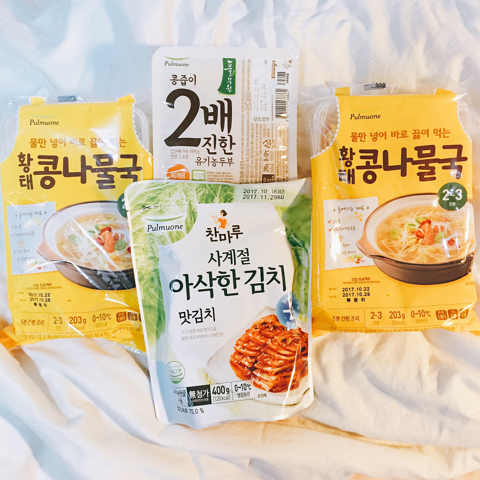

In [60]:
img_path = next(path_iterer)
Image.open(img_path).resize((480, 480))

In [67]:
example = ['', '으', 'ee', 's', '', 'sss', 'e', 'ssp', '한크리l', 'hot', 'BURGER', 'CrIsPy', 'CHICKEN']

In [72]:
lexicon[lexicon['preprocess'].map(lambda x : True if re.compile('').match(x) else False)]

,FOOD_CD,preprocess,ed


In [34]:
ratio_list = [0.5311337102885276, 1.4688662897114724]

In [68]:
threshold = (100 - (100/len(example)))/100 - 0.1
# threshold = (1*len(example) - max(ratio_list) ) / len(example) 

In [69]:
start_time = time.time()
ed_list = []

for word in lexicon['preprocess']:
    min_ed = []
    word_split = word.split('_')
    for idx, each in enumerate(example):
        each_ed = []
        for word_ in word_split:
            ed = levenshtein(each, word_)
            er = ed/(max(len(word_), len(each)))
            if er > 0.5:
                er= 1
            each_ed.append(er)
#             print(f'{each} -> {word_} : {er}')
#         min_ed.append(ratio_list[idx] * min(each_ed))
        min_ed.append(min(each_ed))
    ed_list.append(sum(min_ed)/len(example))

lexicon['ed'] = ed_list

min_data = lexicon[lexicon['ed'] == lexicon['ed'].min()]
if min_data['ed'].min() >=threshold:
    print(f'not in lexicon(ED : {min_data["ed"].min()})')
else:
    min_idx = min_data['preprocess'].apply(lambda x :  abs(len(example) - len(x.split('_')))).sort_values().index[0]
    print(f'Search Result : {lexicon.loc[min_idx]["preprocess"]}, FOOD CD : {lexicon.loc[min_idx]["FOOD_CD"]},  ED : {round(lexicon.loc[min_idx]["ed"],2)}')
    
# why
print('elapsed time :',time.time() - start_time)

Search Result : hot_CrIsPY_CHICKEN_BURGER, FOOD CD : N245000658,  ED : 0.71
elapsed time : 2.3219146728515625


In [70]:
threshold

0.823076923076923

In [36]:
' '.join(['씬크리스피_슈프림피자_피자헛'])

'씬크리스피_슈프림피자_피자헛'

In [ ]:
lexicon.head(100)

In [84]:
lexicon[lexicon['preprocess'].apply(lambda x : bool(re.compile('몽쉘').match(x)))]

,FOOD_CD,preprocess
75,N022000086,몽쉘통통


In [37]:
# ed_list = []
# for word in why['preprocess']:
#     word_ed = []
#     word_split = word.split('_')
#     print(word)
#     for word_ in word_split:
#         best_of_word = []
#         for each in example :
#             ed = levenshtein(each, word_)
#             er = ed/(max(len(word_), len(each)))
#             if er > 0.5:
#                 er= 1
#             print(f'{word_} -> {each} : ED {ed}, ER {er}')
#             best_of_word.append(er)
#         print(f'{word_} -> {example} : best_of_word : {best_of_word}')
#         word_ed.append(min(best_of_word))
#     print('word_ed : ', word_ed)
#     n_1 = word_ed.count(1)
#     if n_1 >1:
#         for _ in range(n_1 -1):
#             word_ed.pop(1)
#             print(f'after pop WORD_ED  {word_ed}')
#             div_val = len(word_split) - n_1 + 1
#             ed_list.append(sum(word_ed)/len(div_val))
#     else:
#         ed_list.append(sum(word_ed)/len(word_split))

소고기육포
소고기육포 -> 만한대장 : ED 5, ER 1
소고기육포 -> 매은 : ED 5, ER 1
소고기육포 -> 소고기맛 : ED 2, ER 0.4
소고기육포 -> ['만한대장', '매은', '소고기맛'] : best_of_word : [1, 1, 0.4]
word_ed :  [0.4]


In [20]:
# ed_list = []
# for word in why['preprocess']:
#     word_ed = 0
#     word_split = word.split('_')
#     print(word)
#     for each in example :
    
#         each_best = []    
#         for word_ in word_split:
#             ed = levenshtein(each, word_)
#             er = ed/(max(len(word_), len(each)))
#             if er > 0.5:
#                 er= 1
#             print(f'{word_} -> {each} : ED {ed}, ER {er}')
#             each_best.append(er)
#         print(f'{word_} -> {example} : each_list : {each_best}')
#         print(min(each_best))
#         word_ed += min(each_best)
#     ed_list.append(word_ed/len(word_split))

소고기육포
소고기육포 -> 만한대장 : ED 5, ER 1
소고기육포 -> ['만한대장', '매은', '소고기맛'] : each_list : [1]
1
소고기육포 -> 매은 : ED 5, ER 1
소고기육포 -> ['만한대장', '매은', '소고기맛'] : each_list : [1]
1
소고기육포 -> 소고기맛 : ED 2, ER 0.4
소고기육포 -> ['만한대장', '매은', '소고기맛'] : each_list : [0.4]
0.4


---------------

# 다합치기

In [5]:
lexicon = pd.read_csv('OCR_lexicon_pre.csv')
lexicon

,가공식품,preprocess
0,"비스켓, 패스트푸드",비스켓_패스트푸드
1,"비스켓 ,KFC",비스켓_KFC
2,"엔칠라다, 패스트푸드",엔칠라다_패스트푸드
3,애플파이_맥도날드,애플파이_맥도날드
4,애플파이_버거킹,애플파이_버거킹
...,...,...
2450,에그 베이글 스타벅스,에그_베이글_스타벅스
2451,베이컨 치즈베이글 스타벅스,베이컨_치즈베이글_스타벅스
2452,포크 커틀릿 샌드위치 스타벅스,포크_커틀릿_샌드위치_스타벅스
2453,만한대찬 우육면 매운 소고기맛 Uni President,만한대찬_우육면_매운_소고기맛_Uni_President


In [16]:
lexicon['join'] = lexicon['preprocess'].str.replace('_', '')
lexicon

,가공식품,preprocess,join,ed
0,"비스켓, 패스트푸드",비스켓_패스트푸드,비스켓패스트푸드,1.250000
1,"비스켓 ,KFC",비스켓_KFC,비스켓KFC,1.666667
2,"엔칠라다, 패스트푸드",엔칠라다_패스트푸드,엔칠라다패스트푸드,1.111111
3,애플파이_맥도날드,애플파이_맥도날드,애플파이맥도날드,1.250000
4,애플파이_버거킹,애플파이_버거킹,애플파이버거킹,1.428571
...,...,...,...,...
2450,에그 베이글 스타벅스,에그_베이글_스타벅스,에그베이글스타벅스,1.111111
2451,베이컨 치즈베이글 스타벅스,베이컨_치즈베이글_스타벅스,베이컨치즈베이글스타벅스,1.000000
2452,포크 커틀릿 샌드위치 스타벅스,포크_커틀릿_샌드위치_스타벅스,포크커틀릿샌드위치스타벅스,1.000000
2453,만한대찬 우육면 매운 소고기맛 Uni President,만한대찬_우육면_매운_소고기맛_Uni_President,만한대찬우육면매운소고기맛UniPresident,0.720000


In [17]:
example = '소고기맛매운만한대찬'

In [18]:
ed_list = []
for word  in lexicon['join']:
    ed = levenshtein(example, word)
    er = ed/(len(word))
    ed_list.append(er)
lexicon['ed'] = ed_list

In [19]:
lexicon[lexicon['ed']== lexicon['ed'].min()]

,가공식품,preprocess,join,ed
763,"불고기스모크햄, 한성기업",불고기스모크햄_한성기업,불고기스모크햄한성기업,0.727273
1388,오뚜기카레(매운맛)_오뚜기,오뚜기카레_매운맛_오뚜기,오뚜기카레매운맛오뚜기,0.727273
2350,소고기버섯비빔밥 풀무원,소고기버섯비빔밥_풀무원,소고기버섯비빔밥풀무원,0.727273


##### 다합치기 : 순서가 바뀔경우 실패한다

In [29]:
test_list = ['있냐','있나','잇냐']
for i in ['있냐','없냐']:
    if i in test_list :
        continue
    else:
        test_list.append(i)
        

In [30]:
test_list

['있냐', '있나', '잇냐', '없냐']